# Stack Over Flow Tag Predictor (Case Study)

## Business Problem

### Description

#### Description
<br>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.
<br><br>
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.

### Problem Statemtent

Suggest the tags based on the content that was there in the question posted on Stackoverflow.

Source: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/

### Real World / Business Objectives and Constraints 

    -> Predict as many tags as possible with high precision and recall.
    -> Incorrect tags could impact customer experience on StackOverflow.
    -> No strict latency constraints.

## Machine Learning problem

### Data Overview

Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
<br>
All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>
The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).<br />
<br />


__Data Field Explaination__

Dataset contains 6,034,195 rows. The columns in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>

<br />

### Example Data point i.e Question in Stackoverflow

<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

## Mapping the real-world problem to a Machine Learning Problem 

### Type of Machine Learning Problem(MultiLabel Classification)

It is a Multi lable Classification Problem i.e one question can have many tags , as Tags may be related to any Domain like C, C++, Java or other Domains.

http://scikit-learn.org/stable/modules/multiclass.html

### Performance metric 

F1 Score of binary classification can be applied here(for Multi Label Classification) by small modification , we can use any of these two types Micro/Mean F1 score or Macro F1 score,
Suggested is Micro/Mean F1 Score as it Considers Label Imbalance.<br>

<b>Micro-Averaged F1-Score (Mean F Score) </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. <br>

<b>'Micro/Mean f1 score': </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives, It Even Considers Frequency of label it would be advantage where if a class has 2 tags where one tag has high freq and other tag as low freq as it will calculate weighted avg our precision and recall will be high as they are high for first tag. This is a better metric when we have class imbalance.
<br>

<b>'Macro f1 score': </b><br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
<br>

#### sklearn.metrics.f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)
average parameter -> micro,macro,binary,samples here we can use micro or macro for our example


http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html <br>
<br>
<b> Hamming loss </b>: The Hamming loss is the fraction of labels that are incorrectly predicted. <br>

<b>Formula:</b>
HammingLoss(y,y_pred) = (1/n)*(sum(xor(y,y_pred))/no.of labels)
<br>n-> num of samples
<br>
if sum of xor val is large then it indicates it predicted wrong labels.



In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from skmultilearn.adapt import mlknn
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from datetime import datetime
import pickle
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

# Exploratory Data Analysis

### Data Loading(using Pandas with SQLite) And Cleaning

Converting Csv File to Db so that we can perform data operations very easily using SQLite.<br>
using ChunkSize of 180000 i.e for every 180000 rows inserted it will commit.

Dont run this code every time.

In [12]:
'''if not os.path.isfile('train.db'):
    start = datetime.now()
    #creating connection to db, it takes url and conn parameters 
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j=0
    index_start = 1
    for df in pd.read_csv('Train.csv',names=['Id','Title','Body','Tags'],
                         chunksize=chunksize,iterator=True,encoding='utf-8'):
        df.index +=index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        
        # data is table name
        
        df.to_sql('data',disk_engine,if_exists='append')
        index_start = df.index[-1] + 1
    print("Time Taken to run this Snippet: ",datetime.now() - start)
'''    

180000 rows
360000 rows
540000 rows
720000 rows
900000 rows
1080000 rows
1260000 rows
1440000 rows
1620000 rows
1800000 rows
1980000 rows
2160000 rows
2340000 rows
2520000 rows
2700000 rows
2880000 rows
3060000 rows
3240000 rows
3420000 rows
3600000 rows
3780000 rows
3960000 rows
4140000 rows
4320000 rows
4500000 rows
4680000 rows
4860000 rows
5040000 rows
5220000 rows
5400000 rows
5580000 rows
5760000 rows
5940000 rows
6120000 rows
Time Taken to run this Snippet:  0:08:55.996504


### Lets Check How many rows have been Inserted into DB

In [25]:
if os.path.isfile("train.db"):
    start = datetime.now()
    con = sqlite3.connect("train.db")
    num_rows = pd.read_sql_query("select count(*) from data",con)
    
    print("num of rows: ",num_rows['count(*)'][0])
    
    con.close()
    
    print("Time taken to Execute Query: ",datetime.now() - start)
else:
    print("No DB file Here")

num of rows:  6034196
Time taken to Execute Query:  0:00:00.141650


In [27]:
num_rows.head()

,count(*)
0,6034196


>Observation: We have __6034196__ i.e 6 million data points in Train Data

### Checking Duplicates

There may be same questions asked by different people, lets check how many duplicates are present in our data

In [29]:
if os.path.isfile('train.db'):
    start = datetime.now()
    con = sqlite3.connect("train.db")
    df_duplicates = pd.read_sql_query("select Title,body,tags,count(*) as cnt_dup from data group by title,body,tags ",con)
    con.close()
    print("Time Taken:", datetime.now() - start)
else:
    print("No Db File here get One")

Time Taken: 0:24:59.363073


In [32]:
df_duplicates.head()

,Title,Body,Tags,cnt_dup
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2


In [34]:
print("No of duplicates: ",sum(df_duplicates['cnt_dup'][df_duplicates['cnt_dup']>1]-1))

No of duplicates:  1827881


Observation: We have 1827881 duplicate rows in our data set i.e around 30%

##### No.of times each question appeard in our data base

In [38]:
df_duplicates['cnt_dup'].value_counts()

1    2656284
2    1272336
3     277575
4         90
5         25
6          5
Name: cnt_dup, dtype: int64

##### Adding a new feature number of tags per question

In [49]:
start = datetime.now()

df_duplicates["tag_count"] = df_duplicates["Tags"].apply(lambda x: len(x.split(" ")) if x!=None else 0)

print("Time taken to run this cell :", datetime.now() - start)
df_duplicates.head()

Time taken to run this cell : 0:00:03.104666


,Title,Body,Tags,cnt_dup,tag_count
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1,2
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1,3
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1,4
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1,2
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2,2


##### Lets Check How many Questions have How many no.of Tags

In [65]:
df_duplicates.tag_count.value_counts()

3    1206157
2    1111706
4     814996
1     568291
5     505158
0          7
Name: tag_count, dtype: int64

##### Removing question without any tags 

In [71]:
df_duplicates = df_duplicates[df_duplicates['tag_count']!=0]

In [74]:
df_duplicates.tag_count.value_counts()

3    1206157
2    1111706
4     814996
1     568291
5     505158
Name: tag_count, dtype: int64

#### Creating a new Database Without any Duplicates

In [17]:
if not os.path.isfile('train_no_dup.db'):
    disk_dup = create_engine("sqlite:///train_no_dup.db")
    no_dup = pd.DataFrame(df_duplicates, columns=['Title','Body','Tags'])
    no_dup.to_sql('no_dup_train',disk_dup)

In [81]:
#creating the connection with database file.
'''if os.path.isfile('train_no_dup.db'):
    start = datetime.now()
    con = sqlite3.connect('train_no_dup.db')
    tag_data = pd.read_sql_query("""SELECT Tags FROM no_dup_train""", con)
    #Always remember to close the database
    con.close()
    print(type(tag_data))
    print(tag_data.head())
    # Let's now drop unwanted column.
    tag_data.drop(tag_data.index[0], inplace=True)
    #Printing first 5 columns from our data frame
    tag_data.head()
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("No Db File Here")'''

<class 'pandas.core.frame.DataFrame'>
                                  Tags
0                                c++ c
1          c# silverlight data-binding
2  c# silverlight data-binding columns
3                             jsp jstl
4                            java jdbc
Time taken to run this cell : 0:01:37.114387


In [ ]:
# Renaming df_duplicates to df_no_duplicates previously used wrong name
#df_no_duplicates = df_duplicates
#del df_duplicates


In [21]:
# removing 1st row its extra
#df_no_duplicates=df_no_duplicates.drop(df_no_duplicates.index[0])

In [22]:
df_no_duplicates.head()

,Title,Body,Tags,cnt_dup,tag_count
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1,3
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1,4
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1,2
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2,2
5,Better way to update feed on FB with PHP SDK,<p>I am a novice with the Facebook API. I have...,facebook api facebook-php-sdk,1,3


In [23]:
df_no_duplicates = df_no_duplicates[['Title','Body','Tags']]

In [26]:
df_no_duplicates.head()

,Title,Body,Tags
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc
5,Better way to update feed on FB with PHP SDK,<p>I am a novice with the Facebook API. I have...,facebook api facebook-php-sdk


In [ ]:
'''pickle_out = open("no_dup_Data_Final.pickle","wb")
pickle.dump(df_no_duplicates,pickle_out)
pickle.dump(tag_data,pickle_out)
pickle_out.close()'''

In [2]:
pickle_in = open("no_dup_Data_Final.pickle","rb")
df_no_duplicates=pickle.load(pickle_in)
tag_data=pickle.load(pickle_in)

In [3]:
df_no_duplicates.shape

(4206307, 3)

In [4]:
tag_data.shape

(4206307, 1)

## Analysis of Tags

### No.of Unique Tags

In [5]:
# Lets Use BOW so that we can get unique Features from Tags

vectorizer = CountVectorizer(tokenizer =  lambda x: x.split())

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.

tag_dtm = vectorizer.fit_transform(tag_data['Tags'])

In [6]:
print("No of Data Points: ",tag_dtm.shape[0])
print("No of unique tags: ",tag_dtm.shape[1])

No of Data Points:  4206307
No of unique tags:  42048


Observation: We have 4206307 data points and 42048 unique Features/tags

In [16]:
tags = vectorizer.get_feature_names()

print("Some of the tags: ",tags[1000:1010])

Some of the tags:  ['algol68', 'algorithm', 'algorithm-analysis', 'algorithm2e', 'algorithmic', 'algorithmic-game-theory', 'algorithmic-trading', 'algorithmicx', 'algorithms', 'alias']


### No of Times Tag Appeared in The Data Points

In [17]:
#How to Access Sparse Matrix 
#https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements

#below is the Visulization of how it calculates frequency of tags
freqs = tag_dtm.sum(axis=0).A1 #axis 0 -> col
result = dict(zip(tags,freqs))

<table>
    <tr>
        <th>Data Point</th>
        <th>tag1</th>
        <th>tag2</th>
        <th>tag3</th>
    </tr>
    <tr>
        <td>1</td>
        <td>2</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>2</td>
        <td>0</td>
        <td>2</td>
        <td>3</td>
    </tr>
    <tr>
        <td>3</td>
        <td>4</td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <th>Freq:</th>
        <td>6</td>
        <td>4</td>
        <td>4</td>
    </tr>
</table>

In [41]:
#Saving this dictionary to csv files.
if not os.path.isfile('tag_counts_dict_dtm.csv'):
    with open('tag_counts_dict_dtm.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
tag_df = pd.read_csv("tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,.a,18
1,.app,37
2,.asp.net-mvc,1
3,.aspxauth,21
4,.bash-profile,138


In [42]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

In [45]:
tag_df_sorted.head()

,Tags,Counts
4337,c#,331505
18069,java,299414
27249,php,284103
18157,javascript,265423
1234,android,235436


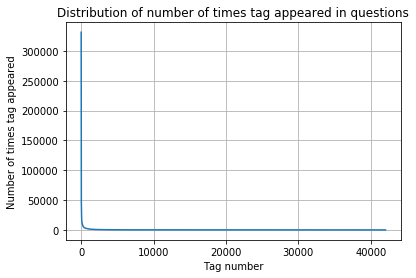

In [46]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared in questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

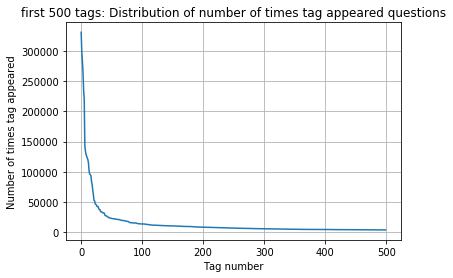

100 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3483]


In [47]:
plt.plot(tag_counts[0:500])
plt.title('first 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:500:5]), tag_counts[0:500:5])

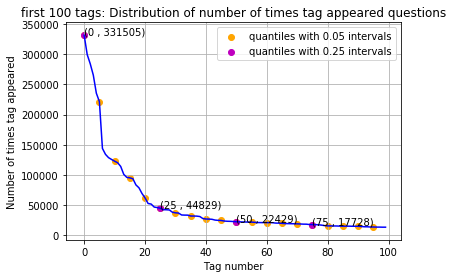

20 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703]


In [49]:
plt.plot(tag_counts[0:100], c='b')

# quantiles with 0.05 difference
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [51]:
# Storing tags which appeared in more than 10K Data points in one list
lst_tags_gt_10k = tag_df[tag_df.Counts>10000].Tags
#Print the length of the list
print ('{} Tags are used more than 10000 times'.format(len(lst_tags_gt_10k)))
# Storing tags which appeared in more than 100K Data points in one list
lst_tags_gt_100k = tag_df[tag_df.Counts>100000].Tags
#Print the length of the list.
print ('{} Tags are used more than 100000 times'.format(len(lst_tags_gt_100k)))

lst_tags_gt_200k = tag_df[tag_df['Counts']>200000].Tags
#Print the length of the list.
print ('{} Tags are used more than 200000 times'.format(len(lst_tags_gt_200k)))

153 Tags are used more than 10000 times
14 Tags are used more than 100000 times
6 Tags are used more than 200000 times


Observations: These are the tags that appeared in more than 10k 100k 200k data points.
<br>

6 tags which appeared in 200000 data points


##### Since some tags occur much more frequenctly than others, Micro-averaged F1-score is the appropriate metric for this probelm.

### Tags Per Question

In [52]:
#Storing the count of tag in each question in list 'tag_count'

#below is the Visualization of tags count in a row
tag_quest_count = tag_dtm.sum(axis=1).tolist() #row sum
#Converting each value in the 'tag_quest_count' to integer.
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))

print(tag_quest_count[:5])



We have total 4206307 datapoints.
[3, 4, 2, 2, 3]


<table>
    <tr>
        <th>Data Point</th>
        <th>tag1</th>
        <th>tag2</th>
        <th>tag3</th>
        <th>No.of Tags</th>
    </tr>
    <tr>
        <td>1</td>
        <td>2</td>
        <td>1</td>
        <td>0</td>
        <td>3</td>
    </tr>
    <tr>
        <td>2</td>
        <td>0</td>
        <td>2</td>
        <td>3</td>
        <td>5</td>
    </tr>
    <tr>
        <td>3</td>
        <td>4</td>
        <td>1</td>
        <td>1</td>
        <td>6</td>
    </tr>
</table>

In [55]:
print(max(tag_quest_count))
print(min(tag_quest_count))

5
1


Observation: There are Maximum of 5 Tags min of 1 tag

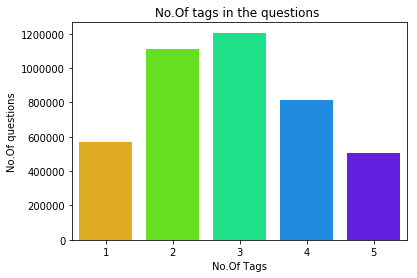

In [56]:
sns.countplot(tag_quest_count, palette='gist_rainbow')
plt.title("No.Of tags in the questions ")
plt.xlabel("No.Of Tags")
plt.ylabel("No.Of questions")
plt.show()

##### Observation:<br>
    -> Max no.of Data points have 2 or 3 tags
    -> Min no.of tags 1 and Max no.of tags 5

### Most Frequent Tags Visualization

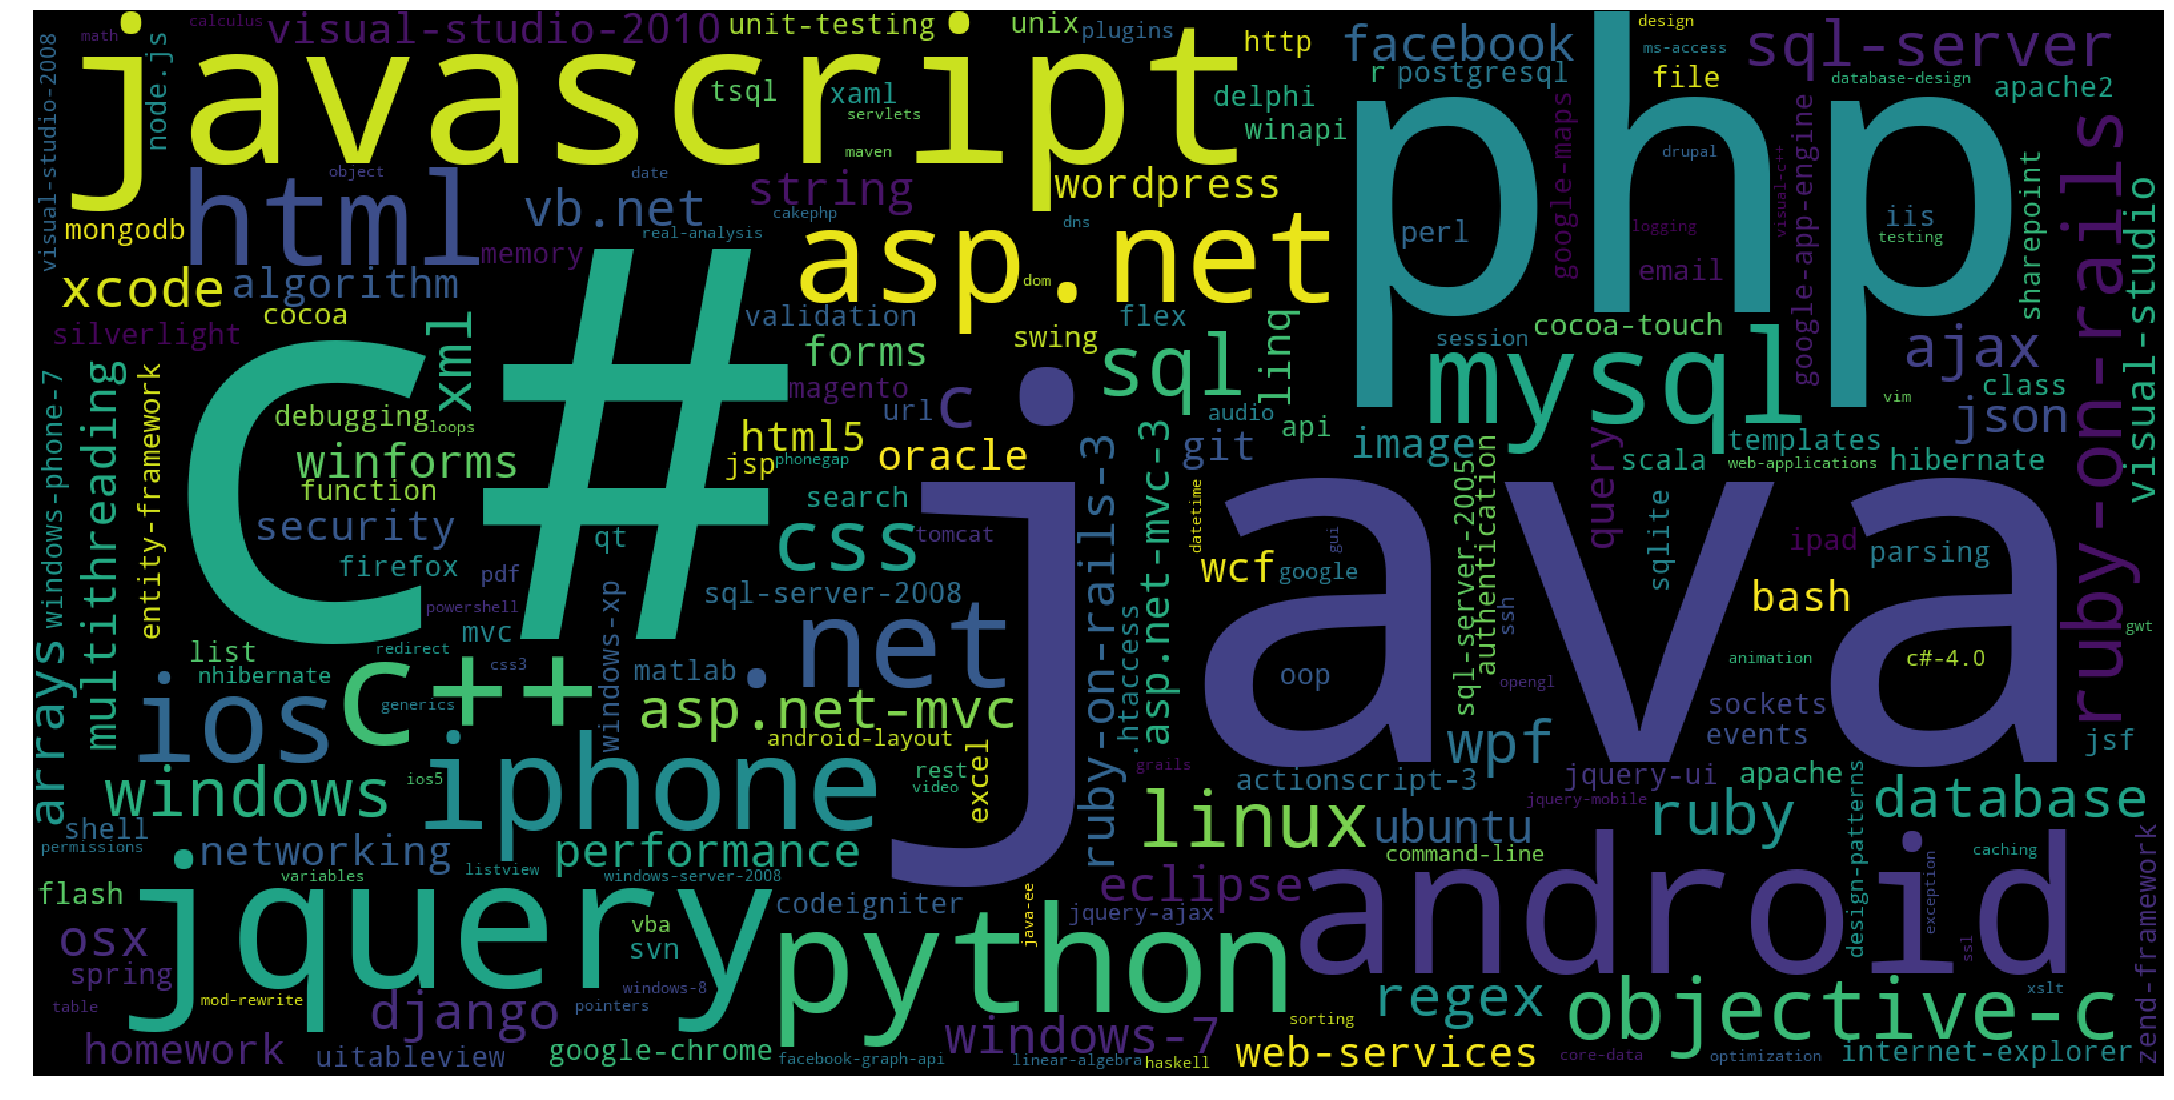

Time taken to run this cell : 0:00:03.460946


In [62]:
# Ploting word cloud
start = datetime.now()

tup =result
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

### Top 10 Tags

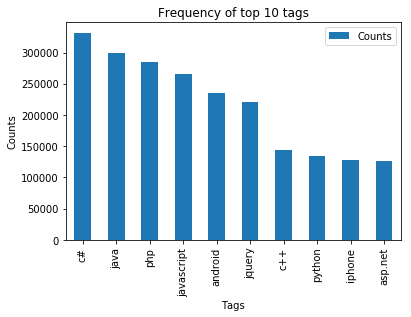

In [85]:
i=np.arange(10)
tag_df_sorted.head(10).plot(kind='bar')
plt.title('Frequency of top 10 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

##### Observation:<br>
    -> Most Used tag is C# and Java
    -> All Top 10 Tags related to Programming Languages
    -> In Smartphones iphone is only phone in top 10

### Top 30 Tags

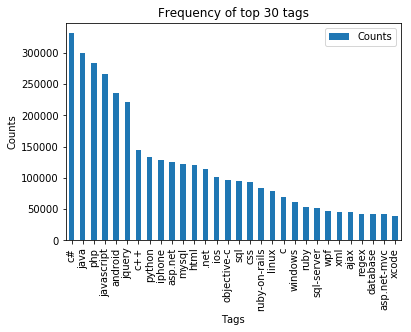

In [86]:
i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 30 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

##### Observation:
    -> .net linux and Windows are in top 20
    -> Android is most frequently used in all the OS's available

## Cleaning and Preprocessing of Questions

### Pre Processing

<ol> 
    <li> Sample 1M data points </li>
    <li> Separate out code-snippets from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

#### 1. Removing HTML Tags

In [14]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [15]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

def create_database_table(database, query):
    conn = create_connection(database)
    if conn is not None:
        create_table(conn, query)
        checkTableExists(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()

sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Processed.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


In [90]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table
start = datetime.now()
read_db = 'train_no_dup.db'
write_db = 'Processed.db'
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 1000000;")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")
print("Time taken to run this cell :", datetime.now() - start)

Tables in the databse:
QuestionsProcessed
Cleared All the rows
Time taken to run this cell : 0:22:08.080406


##### lets create a new data base to store the sampled and preprocessed questions

In [93]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/

start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:

    is_code = 0

    title, question, tags = row[0], row[1], row[2]

    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))

    title=title.encode('utf-8')

    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

number of questions completed= 100000
number of questions completed= 200000
number of questions completed= 300000
number of questions completed= 400000
number of questions completed= 500000
number of questions completed= 600000
number of questions completed= 700000
number of questions completed= 800000
number of questions completed= 900000
Avg. length of questions(Title+Body) before processing: 1170
Avg. length of questions(Title+Body) after processing: 327
Percent of questions containing code: 57
Time taken to run this cell : 0:24:07.104248


In [94]:
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

In [95]:
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print('='*100)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*100)
conn_r.commit()
conn_r.close()

Questions after preprocessed
('jqueri quicksand xe filter total love orman clark classica wordpress theme unabl link prefilt content alway issu unfortun download found somewhat solut releas sinc upgrad yet abl quicksand function intend work none actual filter content simpli disappear quicksand jq filter work along side permalink workaround copi code straight old templat new resolv issu tri run version side side make comparison sourc code see differ even systemat copi file one one old new see would resolv problem bit pickl realli anyon point issu code would great appreci http www colorspac portfolio asid code permalink filter solut requir build page filter good enough',)
----------------------------------------------------------------------------------------------------
('apach socket close web applic written use cherrypi run local use mod rewrit mod proxi apach act revers proxi apach also handl ssl encrypt may eventu use transfer static content work fine small workload howev recent use

##### Observation: The above is the result after preprocessing and we can see the root words like 'Defin' for 'Define' as we used stemming techniques.

In [6]:
write_db = 'Processed.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
conn_r.commit()
conn_r.close()

In [17]:
preprocessed_data.head()

,question,tags
0,dynam datagrid bind silverlight dynam datagrid...,c# silverlight data-binding columns
1,java.lang.noclassdeffounderror javax servlet j...,jsp jstl
2,java.sql.sqlexcept microsoft odbc driver manag...,java jdbc
3,better way updat feed fb php sdk better way up...,facebook api facebook-php-sdk
4,btnadd click event open two window record ad b...,javascript asp.net web


In [7]:
print(preprocessed_data.shape)

(999999, 2)


# Machine Learning Models

## Converting tags for Multilabel Problems

Solving Multi Label Classification:
https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/

Multi Label Classification can be done in 2 ways by Converting it to no. of binary cliassifiers or By converting it to multi Class Classification. Explained in the above link.

<table>
<tr>
<th>X</th><th>y1</th><th>y2</th><th>y3</th><th>y4</th>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>1</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>1</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>0</td><td>0</td>
</tr>
</table>

In [8]:
# Converting like above Using
# BOW Binary Vectorizer

#splitting the tags
vectorizer = CountVectorizer(tokenizer= lambda x: x.split(), binary = 'true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

In [9]:
multilabel_y.shape

(999999, 35438)

Observation: 999999 data points and 35438 features/tags

##### Lets Consider a subset of tags as I have less computing Power
(Partial Coverage)

In [16]:
def tags_to_choose(n):
    
    # Lets consider the feature which occured more time by summing to get get count of occurance 
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

# Removing questions which dont have the tags which we have choosen as subset from above function
def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    #summing row vals if its 0 -> this question has not tags from our subset
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [45]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

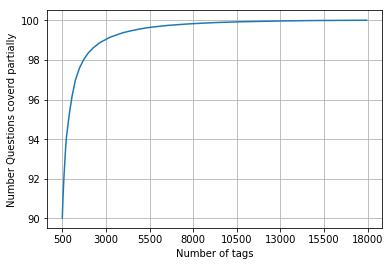

with  5500 tags we are covering  99.038 % of questions


In [59]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")

In [60]:
multilabel_yx = tags_to_choose(5500)
print("number of questions that are not covered :", questions_explained_fn(5500),"out of ", total_qs)

number of questions that are not covered : 9616 out of  999999


In [64]:
print("No.of tags in sample: ", multilabel_y.shape[1])
print("No.of tags Considered: ",multilabel_yx.shape[1])
print("Questions covered percentage: ",100-(questions_explained_fn(5500)/total_qs)*100)
print("Considered Tags percentage: ",(5500/35438)*100,"% Covering 99% questions")

No.of tags in sample:  35438
No.of tags Considered:  5500
Questions covered percentage:  99.03839903839904
Considered Tags percentage:  15.520063208984705 % Covering 99% questions


## Splitting Data into Train(80%) and Test(20%)

In [65]:
total_size=preprocessed_data.shape[0]
train_size=int(0.80*total_size)

x_train=preprocessed_data.head(train_size)
x_test=preprocessed_data.tail(total_size - train_size)

y_train = multilabel_yx[0:train_size,:]
y_test = multilabel_yx[train_size:total_size,:]

In [66]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (799999, 5500)
Number of data points in test data : (200000, 5500)


## Featurizing Data

### TFIDF for Questions

In [67]:
start = datetime.now()
# we are considering upto 3 grams
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:07:24.338156


In [68]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (799999, 88269) Y : (799999, 5500)
Dimensions of test data X: (200000, 88269) Y: (200000, 5500)


#### Note: We can Use MLkNN (Multi label knn) which is provided by skmultilearn, but it doesnt takes sparse matrix as input but through tfidf we got 799999 x 88269 for train data to store this in dense matrix our memory will not be sufficient, so we will not use MLkNN.

"""
from skmultilearn.adapt import MLkNN
classifier = MLkNN(k=21)

#train
classifier.fit(x_train_multilabel, y_train)

#predict
predictions = classifier.predict(x_test_multilabel)
print(accuracy_score(y_test,predictions))
print(metrics.f1_score(y_test, predictions, average = 'macro'))
print(metrics.f1_score(y_test, predictions, average = 'micro'))
print(metrics.hamming_loss(y_test,predictions))

"""

we will get "Memory Error" if we run this coe snippet.

## Applying Logistic Regression with One vs Rest Classifier
This classifiers converts Multi Label to binary classifier i.e if we have 10 features the in will train the model 10 time i.e with f1 one time with f2 one time...10 times.<br>

Applying Logistic Regression is fair enough because SVM and RF takes large amount of time.

One Vs Rest Classifier:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

##### Example:

<table>
    <tr>
        <th>X</th><th>y1</th><th>y2</th><th>y3</th>
    </tr>
    <tr>
        <td>x1</td><td>0</td><td>1</td><td>1</td>
    </tr>
    <tr>
        <td>x2</td><td>1</td><td>0</td><td>0</td>
    </tr>
    <tr>
        <td>x3</td><td>0</td><td>1</td><td>0</td>
    </tr>
</table>
<br>

Will be converted to:<br>

<center><b>Classifier 1:</b></center>
<table>
    <tr>
        <th>X</th>
        <th>y1</th>
    </tr>
    <tr>
        <td>x1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>x2</td>
        <td>1</td>
    </tr>
    <tr>
        <td>x3</td>
        <td>0</td>
    </tr>
</table>
<br>
<center><b>Classifier 2:</b></center>
<table>
    <tr>
        <th>X</th>
        <th>y2</th>
    </tr>
    <tr>
        <td>x1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>x2</td>
        <td>0</td>
    </tr>
    <tr>
        <td>x3</td>
        <td>1</td>
    </tr>
</table>
<br>
<center><b>Classifier 3:</b></center>
<table>
    <tr>
        <th>X</th>
        <th>y3</th>
    </tr>
    <tr>
        <td>x1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>x2</td>
        <td>0</td>
    </tr>
    <tr>
        <td>x3</td>
        <td>0</td>
    </tr>
</table>

In [70]:
# SGD with Log Loss is Logist Regression
'''classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))
'''

'classifier = OneVsRestClassifier(SGDClassifier(loss=\'log\', alpha=0.00001, penalty=\'l1\'), n_jobs=-1)\nclassifier.fit(x_train_multilabel, y_train)\npredictions = classifier.predict(x_test_multilabel)\n\nprint("accuracy :",metrics.accuracy_score(y_test,predictions))\nprint("macro f1 score :",metrics.f1_score(y_test, predictions, average = \'macro\'))\nprint("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = \'micro\'))\nprint("hamming loss :",metrics.hamming_loss(y_test,predictions))\nprint("Precision recall report :\n",metrics.classification_report(y_test, predictions))\n'

#### The Above Snippet is taking huge amount of time, proceeding with 0.5 million data points and Giving More Importance to Title than Body/description.

## Modeling with less data points (0.5M data points) and more weight to title and 500 tags only.

### Performing same steps as befor just change is Giving more weight to title

In [88]:
sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Titlemoreweight.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


In [91]:
read_db = 'train_no_dup.db'
write_db = 'Titlemoreweight.db'
train_datasize = 400000
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        # for selecting first 0.5M rows
        reader.execute("SELECT Title, Body, Tags From no_dup_train LIMIT 500001;")
        print("Success");
        

        
        
if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")
        
        


Success
Tables in the databse:
QuestionsProcessed
Cleared All the rows


### Preprocessing of Questions
<ol> 
    <li> Separate Code from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> <b> Give more weightage to title : Add title three times to the question </b> </li>
   
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [92]:
start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:
    
    is_code = 0
    
    title, question, tags = row[0], row[1], str(row[2])
    
    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x
    
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
    
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))
    
    title=title.encode('utf-8')
    
    # adding title three time to the data to increase its weight
    # add tags string to the training data
    
    question=str(title)+" "+str(title)+" "+str(title)+" "+question
    
#     if questions_proccesed<=train_datasize:
#         question=str(title)+" "+str(title)+" "+str(title)+" "+question+" "+str(tags)
#     else:
#         question=str(title)+" "+str(title)+" "+str(title)+" "+question

    question=re.sub(r'[^A-Za-z0-9#+.\-]+',' ',question)
    words=word_tokenize(str(question.lower()))
    
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    
    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

number of questions completed= 100000
number of questions completed= 200000
number of questions completed= 300000
number of questions completed= 400000
number of questions completed= 500000
Avg. length of questions(Title+Body) before processing: 1239
Avg. length of questions(Title+Body) after processing: 424
Percent of questions containing code: 57
Time taken to run this cell : 0:17:42.909541


In [93]:
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

In [94]:
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print('='*100)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*100)
conn_r.commit()
conn_r.close()

Questions after preprocessed
('java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid follow guid link instal jstl got follow error tri launch jsp page java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid taglib declar instal jstl 1.1 tomcat webapp tri project work also tri version 1.2 jstl still messag caus solv',)
----------------------------------------------------------------------------------------------------
('java.sql.sqlexcept microsoft odbc driver manag invalid descriptor index java.sql.sqlexcept microsoft odbc driver manag invalid descriptor index java.sql.sqlexcept microsoft odbc driver manag invalid descriptor index use follow code display caus solv',)
----------------------------------------------------------------------------------------------------
('better way updat feed fb php sdk better way

#### Getting Preprocessed data from Database

In [10]:
write_db = 'Titlemoreweight.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
conn_r.commit()
conn_r.close()

In [11]:
preprocessed_data.head()

,question,tags
0,dynam datagrid bind silverlight dynam datagrid...,c# silverlight data-binding columns
1,java.lang.noclassdeffounderror javax servlet j...,jsp jstl
2,java.sql.sqlexcept microsoft odbc driver manag...,java jdbc
3,better way updat feed fb php sdk better way up...,facebook api facebook-php-sdk
4,btnadd click event open two window record ad b...,javascript asp.net web


In [97]:
'''pickle_out = open('preprocessed_0.5M.pickle','wb')
pickle.dump(preprocessed_data,pickle_out)
pickle_out.close()'''

In [6]:
pickle_in = open('preprocessed_0.5M.pickle','rb')
preprocessed_data = pickle.load(pickle_in)

In [7]:
preprocessed_data.head()

,question,tags
0,dynam datagrid bind silverlight dynam datagrid...,c# silverlight data-binding columns
1,java.lang.noclassdeffounderror javax servlet j...,jsp jstl
2,java.sql.sqlexcept microsoft odbc driver manag...,java jdbc
3,better way updat feed fb php sdk better way up...,facebook api facebook-php-sdk
4,btnadd click event open two window record ad b...,javascript asp.net web


In [8]:
preprocessed_data.shape

(500000, 2)

In [9]:
# Binary BOW it converts list of tags to list of features
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

In [10]:
multilabel_y.shape

(500000, 29587)

__Considering 500 Tags__

In [18]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

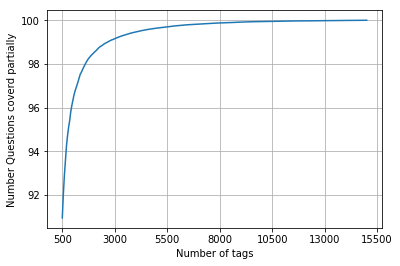

with  5500 tags we are covering  99.157 % of questions
with  500 tags we are covering  90.956 % of questions


In [19]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 500(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")
print("with ",500,"tags we are covering ",questions_explained[0],"% of questions")

In [20]:
# we will be taking 500 tags
multilabel_yx = tags_to_choose(500)
print("number of questions that are not covered :", questions_explained_fn(500),"out of ", total_qs)

number of questions that are not covered : 45221 out of  500000


In [21]:
train_datasize = 400000
x_train=preprocessed_data.head(train_datasize)
x_test=preprocessed_data.tail(preprocessed_data.shape[0] - 400000)

y_train = multilabel_yx[0:train_datasize,:]
y_test = multilabel_yx[train_datasize:preprocessed_data.shape[0],:]

In [22]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (400000, 500)
Number of data points in test data : (100000, 500)


### Featurizing With TFIDF

In [23]:
start = datetime.now()

#considering upto 3 grams
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:03:55.606015


In [24]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (400000, 94928) Y : (400000, 500)
Dimensions of test data X: (100000, 94928) Y: (100000, 500)


In [26]:
pickle_out = open('beforTrainingModel','wb')
pickle.dump(x_train_multilabel,pickle_out)
pickle.dump(x_test_multilabel,pickle_out)
pickle.dump(y_train,pickle_out)
pickle.dump(y_test,pickle_out)
pickle_out.close()

In [2]:
pickle_in=open('beforTrainingModel','rb')
x_train_multilabel=pickle.load(pickle_in)
x_test_multilabel=pickle.load(pickle_in)
y_train=pickle.load(pickle_in)
y_test=pickle.load(pickle_in)

## Applying Logistic Regression with OneVsRest Classifier

In [110]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict (x_test_multilabel)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.23654
Hamming loss  0.0027782
Micro-average quality numbers
Precision: 0.7225, Recall: 0.3261, F1-measure: 0.4493
Macro-average quality numbers
Precision: 0.5468, Recall: 0.2579, F1-measure: 0.3348
             precision    recall  f1-score   support

          0       0.94      0.64      0.76      5519
          1       0.69      0.26      0.38      8189
          2       0.81      0.38      0.52      6529
          3       0.82      0.43      0.56      3231
          4       0.81      0.41      0.54      6430
          5       0.81      0.34      0.48      2878
          6       0.87      0.50      0.63      5086
          7       0.88      0.54      0.67      4533
          8       0.61      0.13      0.22      3000
          9       0.81      0.52      0.64      2765
         10       0.60      0.16      0.25      3051
         11       0.69      0.33      0.45      3009
         12       0.66      0.24      0.35      2630
         13       0.70      0.23      0.35    

In [111]:
from sklearn.externals import joblib
joblib.dump(classifier, 'lr_with_more_title_weight.pkl') 

['lr_with_more_title_weight.pkl']

# Assignment


## 1)Linear SVM

In [24]:
from sklearn.grid_search import GridSearchCV
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict (x_test_multilabel)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Accuracy : 0.24771
Hamming loss  0.00269524
Micro-average quality numbers
Precision: 0.8071, Recall: 0.2953, F1-measure: 0.4323
Macro-average quality numbers
Precision: 0.4171, Recall: 0.2176, F1-measure: 0.2635
             precision    recall  f1-score   support

          0       0.95      0.67      0.79      5519
          1       0.70      0.22      0.34      8189
          2       0.84      0.36      0.50      6529
          3       0.83      0.42      0.55      3231
          4       0.85      0.37      0.52      6430
          5       0.82      0.36      0.50      2878
          6       0.88      0.52      0.65      5086
          7       0.89      0.54      0.67      4533
          8       0.61      0.14      0.23      3000
          9       0.82      0.53      0.64      2765
         10       0.62      0.01      0.02      3051
         11       0.78      0.31      0.45      3009
         12       0.74      0.22      0.34      2630
         13       0.71      0.18      0.29   

## 2) Finding Best Alpha using Grid Search

scipy.sparse.csr.csr_matrix

In [ ]:
from sklearn.grid_search import GridSearchCV
start = datetime.now()

tuned_parameters = {'estimator__alpha':[10**-4,10**-2]}

#classifier1 = OneVsRestClassifier(GridSearchCV(SGDClassifier(loss='log', penalty='l1'),param_grid=tuned_parameters,scoring='f1',n_jobs=-1), n_jobs=-1)

classifier1 = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1'))

classifier_tuning = GridSearchCV(classifier1,param_grid=tuned_parameters,scoring='f1',n_jobs=-1)

classifier_tuning.fit(x_train_multilabel, y_train.todense())

#lassifier1.fit(x_train_multilabel, y_train)

print(classifier_tuning)

In [ ]:
import pickle
pickle_out = open("bestHyperParam.pickle","wb")
pickle.dump(classifier_tuning,pickle_out)

In [ ]:
print(x_train_multilabel.shape)
print(y_train.shape)

In [20]:
'''clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1', alpha=0.1))
clf.fit(x_train_multilabel, y_train.todense())'''

OneVsRestClassifier(estimator=SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
          n_jobs=1)

## 3)BOW 4Grams on Questions

In [22]:
vectorizer1 = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer1.fit_transform(preprocessed_data['tags'])

In [23]:
# we will be taking 500 tags
multilabel_yx = tags_to_choose(500)
print("number of questions that are not covered :", questions_explained_fn(500),"out of ", total_qs)

number of questions that are not covered : 45221 out of  500000


In [24]:
train_datasize = 400000
x_train=preprocessed_data.head(train_datasize)
x_test=preprocessed_data.tail(preprocessed_data.shape[0] - 400000)

y_train = multilabel_yx[0:train_datasize,:]
y_test = multilabel_yx[train_datasize:preprocessed_data.shape[0],:]

In [25]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (400000, 500)
Number of data points in test data : (100000, 500)


In [26]:
start = datetime.now()
vectorizer2 = CountVectorizer(tokenizer = lambda x: x.split(), ngram_range=(1,4),binary='true')
x_train_multilabel = vectorizer2.fit_transform(x_train['question'])
x_test_multilabel = vectorizer2.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:07:17.284951


In [27]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (400000, 44351092) Y : (400000, 500)
Dimensions of test data X: (100000, 44351092) Y: (100000, 500)


In [ ]:
start = datetime.now()
classifier_2 = OneVsRestClassifier(LogisticRegression(penalty='l1'))
classifier_2.fit(x_train_multilabel, y_train)
predictions_2 = classifier_2.predict(x_test_multilabel)


# precision = precision_score(y_test, predictions_2, average='micro')
# recall = recall_score(y_test, predictions_2, average='micro')
# f1 = f1_score(y_test, predictions_2, average='micro')
 
# print("Micro-average quality numbers")
# print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

# precision = precision_score(y_test, predictions_2, average='macro')
# recall = recall_score(y_test, predictions_2, average='macro')
# f1 = f1_score(y_test, predictions_2, average='macro')
 
# print("Macro-average quality numbers")
# print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

# print (metrics.classification_report(y_test, predictions_2))
# print("Time taken to run this cell :", datetime.now() - start)

In [ ]:
print(x_train_multilabel.shape, y_train.shape)

In [ ]:
precision = precision_score(y_test, predictions_2, average='micro')
recall = recall_score(y_test, predictions_2, average='micro')
f1 = f1_score(y_test, predictions_2, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions_2, average='macro')
recall = recall_score(y_test, predictions_2, average='macro')
f1 = f1_score(y_test, predictions_2, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions_2))
print("Time taken to run this cell :", datetime.now() - start)